In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
movies_df = pd.read_csv(r'C:\Users\vamsh\Downloads\tmdb-movies.csv' , encoding = 'utf8')

In [3]:
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies_df = movies_df[[ 'original_title', 'genres', 'release_year',
       'cast', 'budget','production_companies',
       'revenue','runtime']]

In [5]:
movies_df.isnull().sum()

original_title             0
genres                    23
release_year               0
cast                      76
budget                     0
production_companies    1030
revenue                    0
runtime                    0
dtype: int64

**PLOTTING MISSING VALUES**

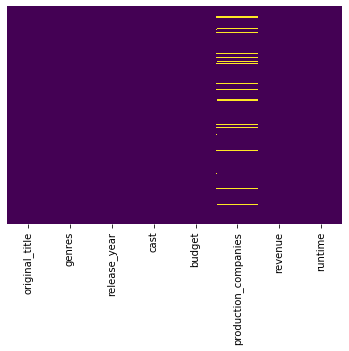

In [6]:
sns.heatmap(movies_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**DROPPING NULL VALUES**

In [7]:
movies_df=movies_df.dropna()

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9792 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   original_title        9792 non-null   object
 1   genres                9792 non-null   object
 2   release_year          9792 non-null   int64 
 3   cast                  9792 non-null   object
 4   budget                9792 non-null   int64 
 5   production_companies  9792 non-null   object
 6   revenue               9792 non-null   int64 
 7   runtime               9792 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 688.5+ KB


In [9]:
movies_df.isnull().sum()

original_title          0
genres                  0
release_year            0
cast                    0
budget                  0
production_companies    0
revenue                 0
runtime                 0
dtype: int64

# EDA(EXPLORATORY DATA ANALYSIS)

In [10]:
movies_df.dtypes

original_title          object
genres                  object
release_year             int64
cast                    object
budget                   int64
production_companies    object
revenue                  int64
runtime                  int64
dtype: object

In [11]:
movies_df.columns

Index(['original_title', 'genres', 'release_year', 'cast', 'budget',
       'production_companies', 'revenue', 'runtime'],
      dtype='object')

**Distribution plots for all numerical variables**

**a. Matplotlib Histograms:**

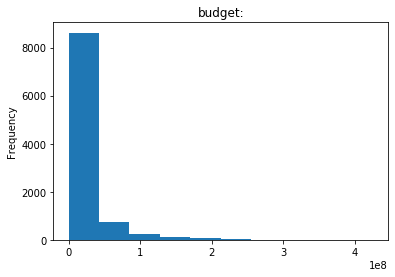

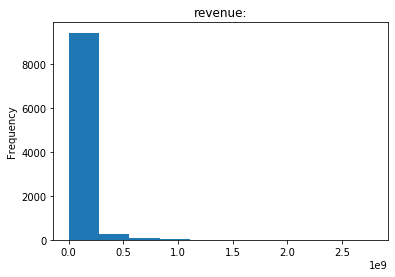

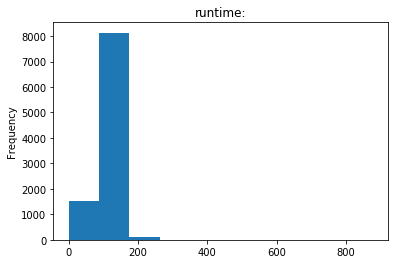

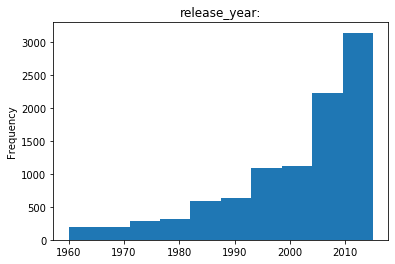

In [12]:
for i in ['budget','revenue','runtime','release_year']:
    plt.title(i+":")
    movies_df[i].plot(kind='hist')
    plt.show()

The X axis for budget and revenue is in terms of 10^8 and 10^9 respectively

**b. Seaborn Distribution and Box Plots:**

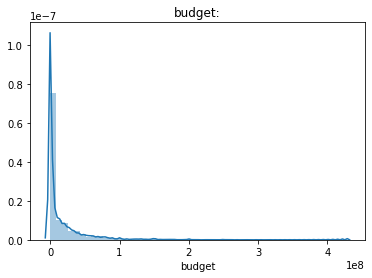

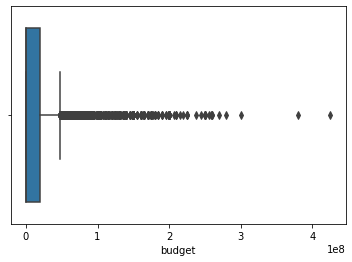

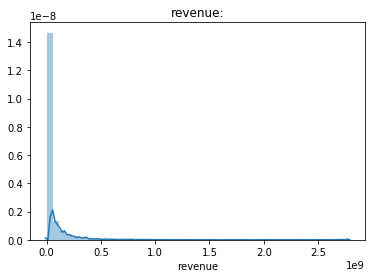

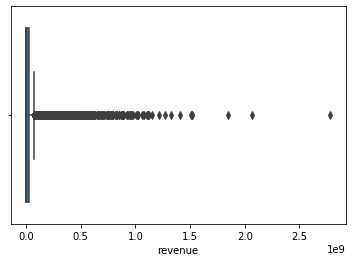

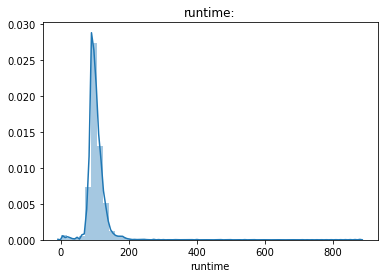

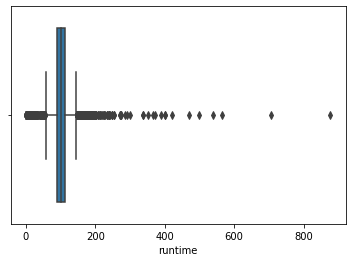

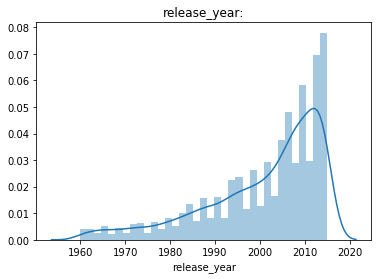

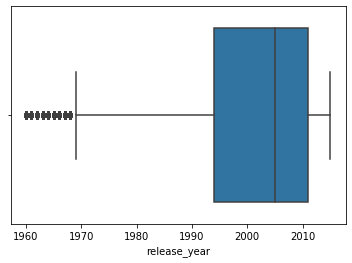

In [13]:
for i in ['budget','revenue','runtime','release_year']:
    plt.title(i+":")
    sns.distplot(movies_df[i])
    plt.show()
    sns.boxplot(movies_df[i])
    plt.show()
    print('\n\n')

**PAIRPLOT**

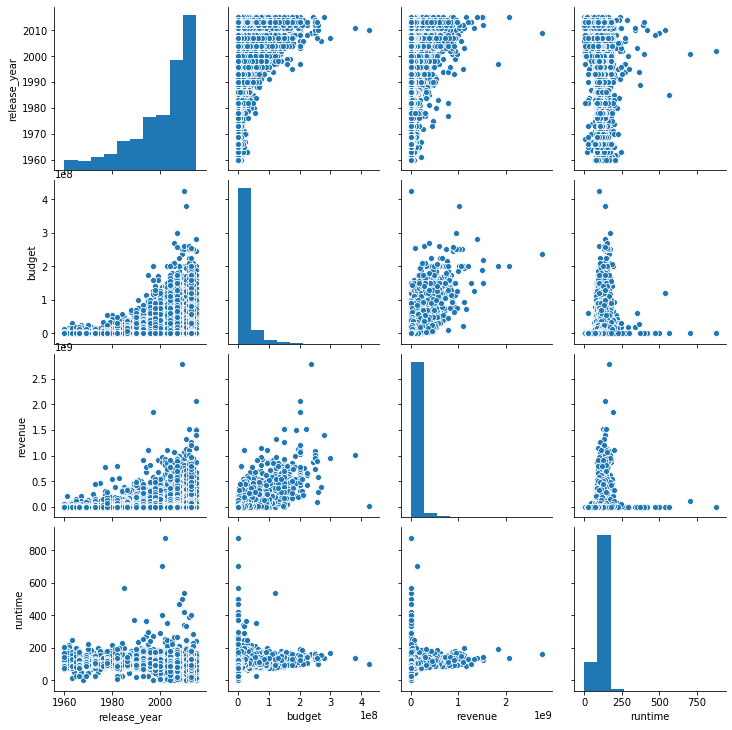

In [14]:
sns.pairplot(movies_df)

**HEATMAP**

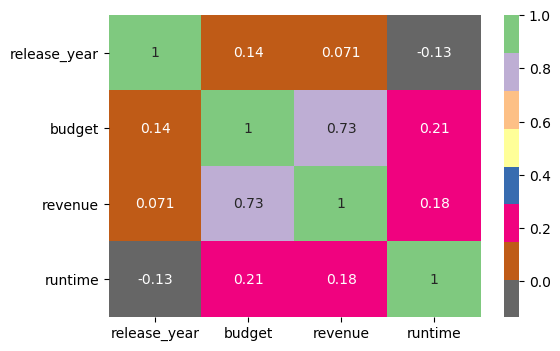

In [15]:
plt.figure(dpi=100)
sns.heatmap(movies_df.corr(),cmap='Accent_r',annot=True)

**1) Which are the movies with the third lowest and third highest budget?**

In [16]:
movies_df_2=movies_df.loc[(movies_df['budget']!=0)]

NOT CONSIDERING MOVIES WITH ZERO BUDGET IN THE DATA SET

In [17]:
movies_df_2=movies_df_2.sort_values('budget',ascending=False)

In [18]:
list1=[]
for i in movies_df_2['budget']:
    list1.append(i)
n=sorted(set(list1))
k=len(n)-3

***THIRD LOWEST***

In [19]:
movies_df_2.loc[(movies_df_2['budget']==n[2])]

,original_title,genres,release_year,cast,budget,production_companies,revenue,runtime
3765,Death of a Superhero,Animation|Drama,2011,Andy Serkis|Thomas Brodie-Sangster|Michael McE...,3,Bavaria Pictures|Grand Pictures|Picture Circle,0,97
2398,Boy,Drama|Comedy,2010,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,3,New Zealand Film Commission|Unison Films|Whenu...,43,87
10050,Tales from the Darkside: The Movie,Fantasy|Horror|Comedy,1990,Rae Dawn Chong|Christian Slater|Deborah Harry|...,3,Paramount Pictures|Laurel Productions|Darkside...,16,93


***THIRD HIGHEST***

In [20]:
movies_df_2.loc[(movies_df_2['budget']==n[k])]

,original_title,genres,release_year,cast,budget,production_companies,revenue,runtime
7387,Pirates of the Caribbean: At World's End,Adventure|Fantasy|Action,2007,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,300000000,Walt Disney Pictures|Jerry Bruckheimer Films|S...,961000000,169


***2) What is the average number of words in movie titles between the year 2000-2005?***

In [21]:
movies_df_y=movies_df.loc[(movies_df['release_year']<=2005)&(movies_df['release_year']>=2000)]
movies_df_y
list1=[]
for i in movies_df_y['original_title']:
    words = i.split()
    list1.append(len(words)) 
print('Average is:',sum(list1)/len(list1),',\n Rounded average is:',round(sum(list1)/len(list1)))

Average is: 2.8363759296822177 ,
 Rounded average is: 3


***3) What is the most common Genre for Vin Diesel & Emma Watson movies?***

In [22]:
def get_key(my_dict,val): 
    list=[]
    for key, value in my_dict.items(): 
         if val == value: 
            list.append(key)
    return list

***MOST COMMON GENRE FOR A VIN DIESEL MOVIE***

In [23]:
movies_df_3=movies_df.loc[(movies_df['cast'].astype(str).str.contains('Vin Diesel'))]
genres_and_count = {}
for i in range(movies_df_3.shape[0]):
    genres = str(movies_df_3['genres'].values[i]).split('|')
    for j in genres:
        try:
            count = genres_and_count[j]
            genres_and_count[j] = count + 1
        except:
            genres_and_count[j] = 1   
print(get_key(genres_and_count,max(genres_and_count.values())))

['Action']


***MOST COMMON GENRE FOR AN EMMA WATSON MOVIE***

In [24]:
movies_df_4=movies_df.loc[(movies_df['cast'].astype(str).str.contains('Emma Watson'))]
movies_df_4.shape
genres_and_count = {}
for i in range(movies_df_4.shape[0]):
    genres = str(movies_df_4['genres'].values[i]).split('|')
    for j in genres:
        try:
            count = genres_and_count[j]
            genres_and_count[j] = count + 1
        except:
            genres_and_count[j] = 1
print(get_key(genres_and_count,max(genres_and_count.values())))

['Family']


***4) Which are the movies with most and least earned revenue?***

In [25]:
movies_df_5=movies_df.loc[(movies_df['revenue']!=0)]

NOT CONSIDERING MOVIES WITH ZERO REVENUE IN THE DATA SET

***MOVIE WITH MOST EARNED REVENUE***

In [26]:
movies_df_5.loc[movies_df_5['revenue']==movies_df_5['revenue'].max()]

,original_title,genres,release_year,cast,budget,production_companies,revenue,runtime
1386,Avatar,Action|Adventure|Fantasy|Science Fiction,2009,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,237000000,Ingenious Film Partners|Twentieth Century Fox ...,2781505847,162


***MOVIE WITH LEAST EARNED REVENUE***

In [27]:
movies_df_5.loc[(movies_df_5['revenue']==movies_df_5['revenue'].min())]

,original_title,genres,release_year,cast,budget,production_companies,revenue,runtime
5067,Shattered Glass,Drama|History,2003,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,6000000,Lions Gate Films|Cruise/Wagner Productions|Bau...,2,94
8142,Mallrats,Romance|Comedy,1995,Jason Lee|Jeremy London|Shannen Doherty|Claire...,6000000,Gramercy Pictures|Alphaville Films|View Askew ...,2,94


**5) What is the average runtime of movies in the year 2006?**

In [28]:
movies_df_6=movies_df.loc[(movies_df['release_year']==2006)]
list1=[]
for i in movies_df_6['runtime']:
        list1.append(i)
print(sum(list1)/len(list1))

101.93714285714286


**6) Name any 3 production companies which have invested money in worse revenue movies?**


In [29]:
movies_df_br=movies_df_2.loc[(movies_df_2['revenue']!=0)]
movies_df_7=movies_df_br.groupby('production_companies').mean()
movies_df_7
movies_df_8=movies_df_7.sort_values('revenue',ascending=False)
movies_df_8[['budget','revenue']]

,budget,revenue
production_companies,,
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment,237000000.0,2.781506e+09
Lucasfilm|Truenorth Productions|Bad Robot,200000000.0,2.068178e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment,200000000.0,1.845034e+09
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,150000000.0,1.513529e+09
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,190000000.0,1.506249e+09
...,...,...
Det Danske Filminstitut|Spring Creek Productions|Eurimages|Costa do Castelo Filmes|Neue Constantin Film,25000000.0,6.000000e+00
Tales From The Crypt Holdings|Universal City Studios,15000000.0,5.000000e+00
Studio 4Â°C,10.0,5.000000e+00


NOT CONSIDERING MOVIES WITH ZERO BUDGET AND ZERO REVENUE IN THE DATA SET

*Here, we are finding net average revenue for the production companies and sorting the production companies to find out which production companies invested in movies which had worse revenue*

In [30]:
movies_df_8[['budget','revenue']].tail(5)

,budget,revenue
production_companies,,
Det Danske Filminstitut|Spring Creek Productions|Eurimages|Costa do Castelo Filmes|Neue Constantin Film,25000000.0,6.0
Tales From The Crypt Holdings|Universal City Studios,15000000.0,5.0
Studio 4Â°C,10.0,5.0
Gramercy Pictures|Alphaville Films|View Askew Productions,6000000.0,2.0
Lions Gate Films|Cruise/Wagner Productions|Baumgarten Merims Productions,6000000.0,2.0
